In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
X=iris.data
X.shape

(150, 4)

In [4]:
y=iris.target
y.shape

(150,)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [7]:
## Using KNN Classification for k=1 

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [9]:
## Measuring Accuracy of prediction
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In [10]:
## Using KNN Classification for K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [11]:
# Best value for KNN Classification?
k_range=list(range(1,31))
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

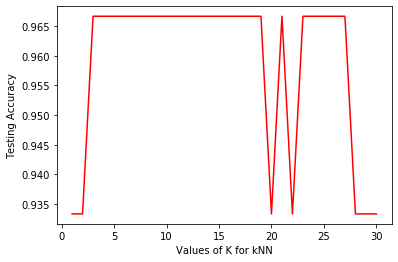

In [12]:
#Plotting line chart for representing the best K
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores, color='red')
plt.xlabel('Values of K for kNN')
plt.ylabel('Testing Accuracy')

In [13]:
# So with k=5 we get the best possible training accuracy through KNN-Classification model

In [14]:
#Actual Prediction
knn.predict([[4.3,2.7,4,1]])

array([1])

In [15]:
iris.target_names[1]         #The predicted species is Versicolor with 96.7% accuracy

'versicolor'

In [16]:
#Better Method: Using Cross-Validation  
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y ,cv=10, scoring='accuracy')   #10folds
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [17]:
scores.mean()        #Same value as we got for k=5 when we used train_test_split

0.9666666666666668

In [18]:
#Finding the best K as we did before but now using Cross Validation method
k_range = list(range(1,31))
k_scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Testing Accuracy')

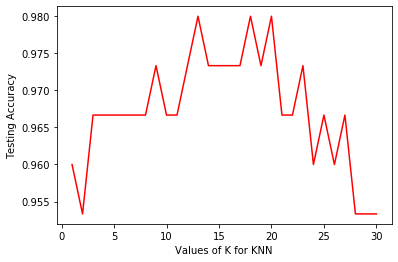

In [19]:
#Visualizing the same
plt.plot(k_range, k_scores, color='red')
plt.xlabel('Values of K for KNN')
plt.ylabel('Testing Accuracy')

In [20]:
#From the above line chart the best value for K is 13
knn = KNeighborsClassifier(n_neighbors=13)
scores = cross_val_score(knn, X, y ,cv=10, scoring='accuracy')   #10folds
print(scores)

[1.         0.93333333 1.         1.         1.         0.93333333
 0.93333333 1.         1.         1.        ]


In [21]:
scores.mean()   #Better score than k=5, hence better results

0.9800000000000001

In [22]:
#now predicting with k=13
knn.fit(X,y)
knn.predict([[4.3,2.7,4,1]])

array([1])

In [23]:
iris.target_names[1]   #Predicted species is Versicolor with accuracy of 98%

'versicolor'